In [106]:
import pandas as pd

In [2]:
df = pd.read_excel("EURO.xls")

In [7]:
df.describe()

curs
count  822.000000
mean    19.804639
std      0.548949
min     19.089000
25%     19.429200
50%     19.621200
75%     20.040200
max     21.342600

In [6]:
df ["curs"].mean()

19.804639294403874

In [13]:
df ["curs_ban"] = df ["curs"] * 100

In [14]:
df 

data     curs  curs_ban
0   2018-11-30  19.5868   1958.68
1   2018-12-01  19.5868   1958.68
2   2018-12-02  19.5868   1958.68
3   2018-12-03  19.5479   1954.79
4   2018-12-04  19.4373   1943.73
..         ...      ...       ...
817 2021-02-24  21.3035   2130.35
818 2021-02-25  21.2724   2127.24
819 2021-02-26  21.3426   2134.26
820 2021-02-27  21.3426   2134.26
821 2021-02-28  21.3426   2134.26

[822 rows x 3 columns]

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:>

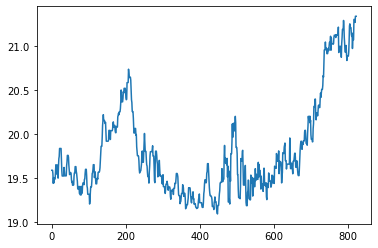

In [15]:
df["curs"].plot()

In [27]:
money = df["curs"]

<AxesSubplot:>

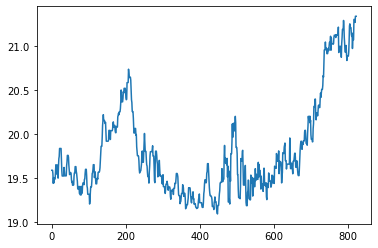

In [28]:
money.plot()

In [18]:
past = 7 * 4 # interval in trecut
future = 7 # interval prognozat 

In [29]:
len(money)

822

In [30]:
start = past 
end = len (money) - future

In [33]:
raw_df = []
for i in range(start,end):
    past_and_future_values = money[(i-past):(i+future)]
    raw_df.append(list(past_and_future_values))

In [38]:
past_columns = []
for i in range (past):
    past_columns.append("past_{}".format(i))

In [41]:
future_columns = []
for i in range (future):
    future_columns.append("future_{}".format(i))

In [45]:
df = pd.DataFrame(raw_df, columns=(past_columns+future_columns))

In [46]:
df 

past_0   past_1   past_2   past_3   past_4   past_5   past_6   past_7  \
0    19.5868  19.5868  19.5868  19.5479  19.4373  19.5029  19.4431  19.4881   
1    19.5868  19.5868  19.5479  19.4373  19.5029  19.4431  19.4881  19.4881   
2    19.5868  19.5479  19.4373  19.5029  19.4431  19.4881  19.4881  19.4881   
3    19.5479  19.4373  19.5029  19.4431  19.4881  19.4881  19.4881  19.5740   
4    19.4373  19.5029  19.4431  19.4881  19.4881  19.4881  19.5740  19.6490   
..       ...      ...      ...      ...      ...      ...      ...      ...   
782  21.0309  21.0955  21.1921  21.1921  21.1921  21.2947  21.2242  21.0973   
783  21.0955  21.1921  21.1921  21.1921  21.2947  21.2242  21.0973  21.0295   
784  21.1921  21.1921  21.1921  21.2947  21.2242  21.0973  21.0295  20.9355   
785  21.1921  21.1921  21.2947  21.2242  21.0973  21.0295  20.9355  20.9355   
786  21.1921  21.2947  21.2242  21.0973  21.0295  20.9355  20.9355  20.9355   

      past_8   past_9  ...  past_25  past_26  past_27  future_0  future_1  \
0    19.4881  19.4881  ...  19.8353  19.7167  19.5835   19.5212   19.5212   
1    19.4881  19.5740  ...  19.7167  19.5835  19.5212   19.5212   19.5212   
2    19.5740  19.6490  ...  19.5835  19.5212  19.5212   19.5212   19.5212   
3    19.6490  19.6229  ...  19.5212  19.5212  19.5212   19.5212   19.5212   
4    19.6229  19.5436  ...  19.5212  19.5212  19.5212   19.5212   19.6191   
..       ...      ...  ...      ...      ...      ...       ...       ...   
782  21.0295  20.9355  ...  21.2129  21.1373  21.1127   21.1510   20.9748   
783  20.9355  20.9355  ...  21.1373  21.1127  21.1510   20.9748   21.0745   
784  20.9355  20.9355  ...  21.1127  21.1510  20.9748   21.0745   21.0745   
785  20.9355  21.0099  ...  21.1510  20.9748  21.0745   21.0745   21.0745   
786  21.0099  20.9071  ...  20.9748  21.0745  21.0745   21.0745   21.3067   

     future_2  future_3  future_4  future_5  future_6  
0     19.5212   19.5212   19.5212   19.6191   19.5679  
1     19.5212   19.5212   19.6191   19.5679   19.5230  
2     19.5212   19.6191   19.5679   19.5230   19.5230  
3     19.6191   19.5679   19.5230   19.5230   19.5230  
4     19.5679   19.5230   19.5230   19.5230   19.5230  
..        ...       ...       ...       ...       ...  
782   21.0745   21.0745   21.0745   21.3067   21.3054  
783   21.0745   21.0745   21.3067   21.3054   21.3035  
784   21.0745   21.3067   21.3054   21.3035   21.2724  
785   21.3067   21.3054   21.3035   21.2724   21.3426  
786   21.3054   21.3035   21.2724   21.3426   21.3426  

[787 rows x 35 columns]

In [50]:
# Invatare

x = df[past_columns] [:-20]
y = df[future_columns] [:-20]

In [52]:
# Verificare

x_test = df[past_columns] [-20:]
y_test = df[future_columns] [-20:]

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
LinReg = LinearRegression()

In [56]:
LinReg.fit(x, y)

LinearRegression()

In [57]:
prediction = LinReg.predict(x_test)

In [58]:
prediction

array([[21.00375473, 21.00353937, 20.98166043, 20.98790403, 20.97964868,
        20.98709561, 20.95987736],
       [20.90823806, 20.88684065, 20.89733246, 20.88755703, 20.90125464,
        20.87562749, 20.90395763],
       [20.81984458, 20.83198626, 20.82619368, 20.83948146, 20.81737261,
        20.8452411 , 20.87626668],
       [20.90192314, 20.89723425, 20.90670819, 20.88604103, 20.90905512,
        20.93899148, 20.90175433],
       [20.88601436, 20.89719498, 20.87839234, 20.90217841, 20.93183326,
        20.89400876, 20.8774241 ],
       [20.90094941, 20.88345496, 20.90606678, 20.93598693, 20.89780821,
        20.8815043 , 20.88661742],
       [20.86746824, 20.88815022, 20.91317772, 20.87246937, 20.85969571,
        20.86690782, 20.8628198 ],
       [20.97477655, 21.01218945, 20.98750849, 20.98635527, 20.97734431,
        20.966707  , 20.95366962],
       [21.09459638, 21.07021359, 21.06592196, 21.05868641, 21.04230676,
        21.02845796, 21.01560766],
       [21.2091563 , 21.2067

In [60]:
prediction[19]

array([21.06280689, 21.03341039, 21.00856006, 20.97818924, 21.00631789,
       20.96937075, 20.96274721])

In [61]:
y_test [-1:]

future_0  future_1  future_2  future_3  future_4  future_5  future_6
786   21.0745   21.3067   21.3054   21.3035   21.2724   21.3426   21.3426

In [62]:
import matplotlib.pyplot as plt

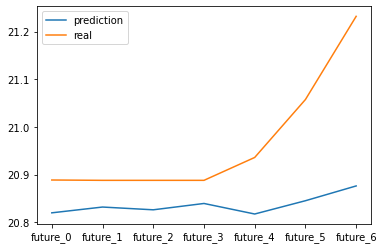

In [87]:
plt.plot(prediction[2], label="prediction")
plt.plot(y_test[-18:].iloc[0], label="real")
plt.legend()

In [69]:
from sklearn.metrics import mean_absolute_error

In [88]:
mean_absolute_error(y_test[-18:].iloc[0], prediction[5])

0.09177403301334865

In [92]:
def printErrors(prediction):
    errors_list = []
    for i in range (len (prediction)):
        error = mean_absolute_error (y_test.iloc[i], prediction[i])
        errors_list.append(error)
    avg_err = sum(errors_list) / len (errors_list)
    max_err = max(errors_list)
    print("eroarea medie = {}".format(avg_err))
    print("eroarea maxima = {}".format(max_err))

In [93]:
printErrors(prediction)

eroarea medie = 0.142552787302982
eroarea maxima = 0.30031951855399186


In [94]:
from sklearn.neural_network import MLPRegressor

In [95]:
MLP = MLPRegressor()

In [96]:
MLP.fit(x,y)

MLPRegressor()

In [99]:
predictionMLP = MLP.predict(x_test)

In [109]:
printErrors(predictionMLP)

eroarea medie = 0.15662750450308072
eroarea maxima = 0.27816918420744685


In [124]:
from sklearn.neighbors import KNeighborsRegressor

In [139]:
KNN = KNeighborsRegressor(n_neighbors=45)

In [140]:
KNN.fit(x,y)

KNeighborsRegressor(n_neighbors=45)

In [141]:
predictionKNN = KNN.predict(x_test)

In [142]:
printErrors(predictionKNN)

eroarea medie = 0.13238933333333253
eroarea maxima = 0.2233174603174563


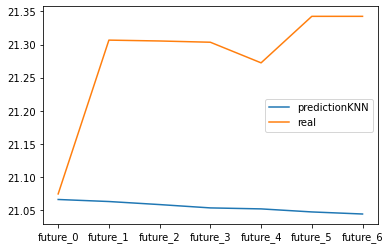

In [143]:
plt.plot(predictionKNN[19], label="predictionKNN")
plt.plot(y_test[-1:].iloc[0], label="real")
plt.legend()

#### 

In [14]:
from sklearn.model_selection import GridSearchCV

In [ ]:
MLP = MLPRegressor(hidden_layer_sizes=(100,100,100))
GSCV = GridSearchCV (MLP, {
    "max_iter": [100,500,1000],
    "learning_rate_init": [0.001, 0.01],
},  cv=3, scoring ='explained_variance')

In [ ]:
GSCV.fit(x,y)

In [ ]:
GSCV.best_estimator_